# New Section

# New Section

In [1]:
import math
import pandas_datareader as web
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv("MRF.NS.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-31,89368.296875,91250.000000,89300.046875,90767.000000,90611.515625,16620
1,2022-11-01,90800.000000,92099.953125,90300.000000,90830.203125,90674.617188,14548
2,2022-11-02,91189.000000,91500.000000,90408.351563,90620.796875,90465.570313,11945
3,2022-11-03,90575.000000,91499.000000,90300.000000,90658.148438,90502.859375,8267
4,2022-11-04,91000.000000,91500.000000,90500.000000,91248.148438,91091.843750,6468
...,...,...,...,...,...,...,...
242,2023-10-20,109170.101563,110046.398438,108900.046875,109504.601563,109504.601563,3657
243,2023-10-23,109350.000000,110400.000000,108639.148438,108977.351563,108977.351563,9731
244,2023-10-25,109299.953125,109948.851563,108150.000000,108632.453125,108632.453125,4580
245,2023-10-26,108700.000000,108700.000000,107075.953125,107481.296875,107481.296875,5675


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df.shape

(247, 7)

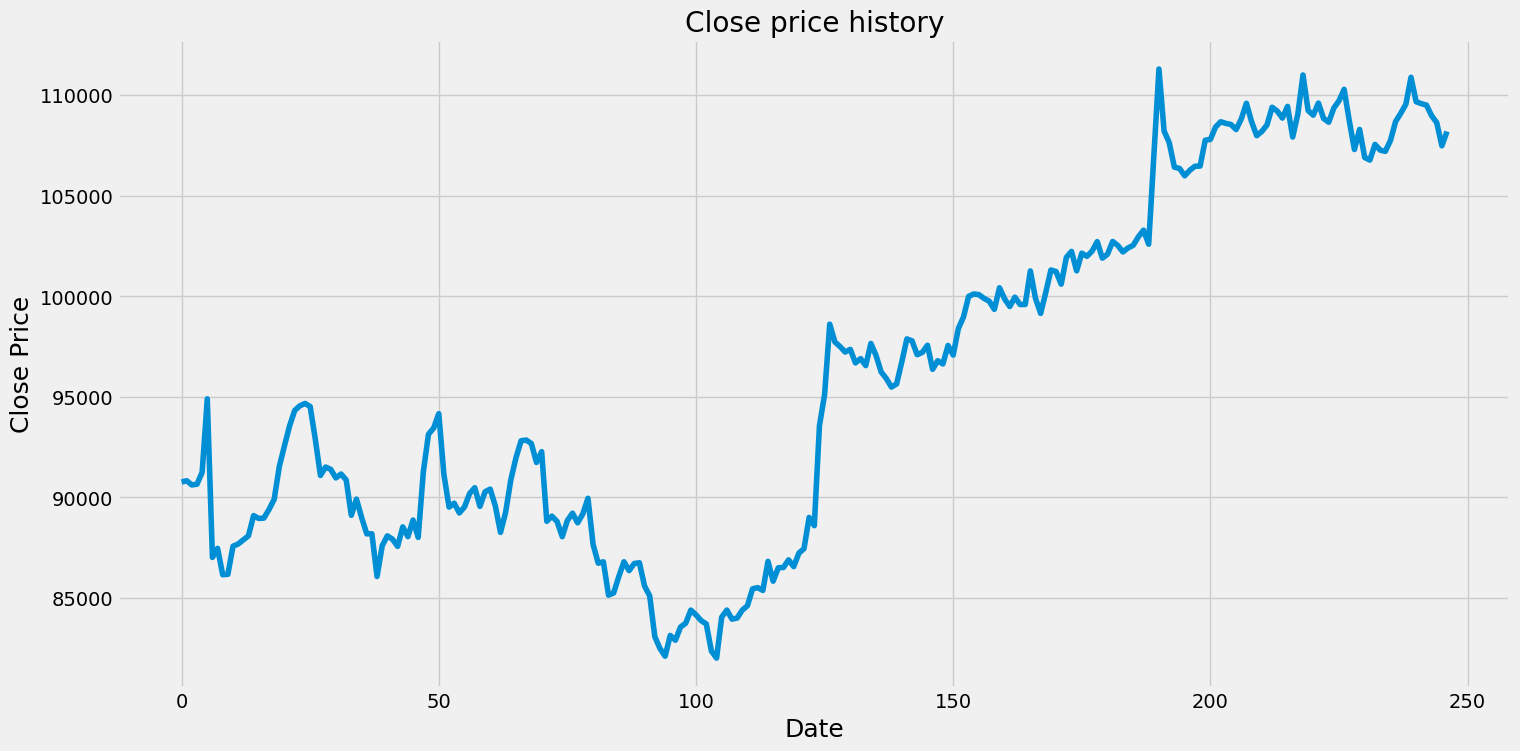

In [5]:
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [6]:
data=df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)* .8 )
training_data_len

198

In [7]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.29896362],
       [0.30112186],
       [0.29397111],
       [0.29524658],
       [0.31539376],
       [0.44009976],
       [0.170925  ],
       [0.18633231],
       [0.14152191],
       [0.14232278],
       [0.18993836],
       [0.19375438],
       [0.20073599],
       [0.20764237],
       [0.2419438 ],
       [0.23712896],
       [0.23770761],
       [0.25244237],
       [0.26951464],
       [0.32514801],
       [0.36036635],
       [0.39425453],
       [0.42047841],
       [0.42828811],
       [0.43236877],
       [0.42701424],
       [0.37130217],
       [0.31007524],
       [0.32435941],
       [0.32036225],
       [0.30589401],
       [0.3125699 ],
       [0.30257821],
       [0.24247469],
       [0.26993642],
       [0.23879527],
       [0.21106569],
       [0.21105875],
       [0.13860575],
       [0.19070162],
       [0.20755514],
       [0.20185593],
       [0.18972334],
       [0.22276129],
       [0.20622524],
       [0.23439528],
       [0.20489508],
       [0.316

In [8]:
train_data=scaled_data[0:training_data_len , :]
x_train=[]
y_train=[]
print(len(train_data))
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

198
[array([0.29896362, 0.30112186, 0.29397111, 0.29524658, 0.31539376,
       0.44009976, 0.170925  , 0.18633231, 0.14152191, 0.14232278,
       0.18993836, 0.19375438, 0.20073599, 0.20764237, 0.2419438 ,
       0.23712896, 0.23770761, 0.25244237, 0.26951464, 0.32514801,
       0.36036635, 0.39425453, 0.42047841, 0.42828811, 0.43236877,
       0.42701424, 0.37130217, 0.31007524, 0.32435941, 0.32036225,
       0.30589401, 0.3125699 , 0.30257821, 0.24247469, 0.26993642,
       0.23879527, 0.21106569, 0.21105875, 0.13860575, 0.19070162,
       0.20755514, 0.20185593, 0.18972334, 0.22276129, 0.20622524,
       0.23439528, 0.20489508, 0.31633789, 0.38004747, 0.39050015,
       0.41496195, 0.31176902, 0.2563216 , 0.26297028, 0.24642222,
       0.25661186, 0.27949433, 0.2892998 , 0.25764483, 0.28234566])]
[0.28692653110006994]



In [ ]:
x_train , y_train=np.array(x_train),np.array(y_train)
print(x_train)
print(y_train)
print()

[[0.29896362 0.30112186 0.29397111 ... 0.2892998  0.25764483 0.28234566]
 [0.30112186 0.29397111 0.29524658 ... 0.25764483 0.28234566 0.28692653]
 [0.29397111 0.29524658 0.31539376 ... 0.28234566 0.28692653 0.25814851]
 ...
 [0.51387946 0.48573984 0.47463515 ... 0.87496292 0.83337255 0.8312794 ]
 [0.48573984 0.47463515 0.46016317 ... 0.83337255 0.8312794  0.81876931]
 [0.47463515 0.46016317 0.46537577 ... 0.8312794  0.81876931 0.82823171]]
[0.28692653 0.25814851 0.2133928  0.24763607 0.30246029 0.33975151
 0.36897852 0.37020784 0.36421491 0.33218431 0.35048058 0.2322405
 0.24104555 0.2319281  0.20618416 0.23368858 0.24599351 0.22973597
 0.24480874 0.27131087 0.19280838 0.1611382  0.16352347 0.1069201
 0.11079587 0.13852385 0.16359177 0.14858196 0.16060891 0.16188758
 0.12241624 0.10583084 0.03634335 0.01640106 0.00324751 0.03854268
 0.03038457 0.05285913 0.05921221 0.08153978 0.07350812 0.06373679
 0.05797436 0.01206616 0.         0.06949762 0.08157392 0.06617489
 0.06807515 0.08149202

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0], x_train.shape[1] , 1))
x_train.shape

(138, 60, 1)

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=( x_train.shape[1] , 1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

138/138 [==============================] - 9s 31ms/step - loss: 0.0198


In [ ]:
test_data=scaled_data[training_data_len -60:, : ]
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i , 0])

In [ ]:
x_test=np.array(x_test)

In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [ ]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

2/2 [==============================] - 1s 20ms/step


In [ ]:
rmse=np.sqrt(np.mean(predictions - y_test)**2)
rmse

4992.841677500001

<ipython-input-21-cece02ace05a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']= predictions


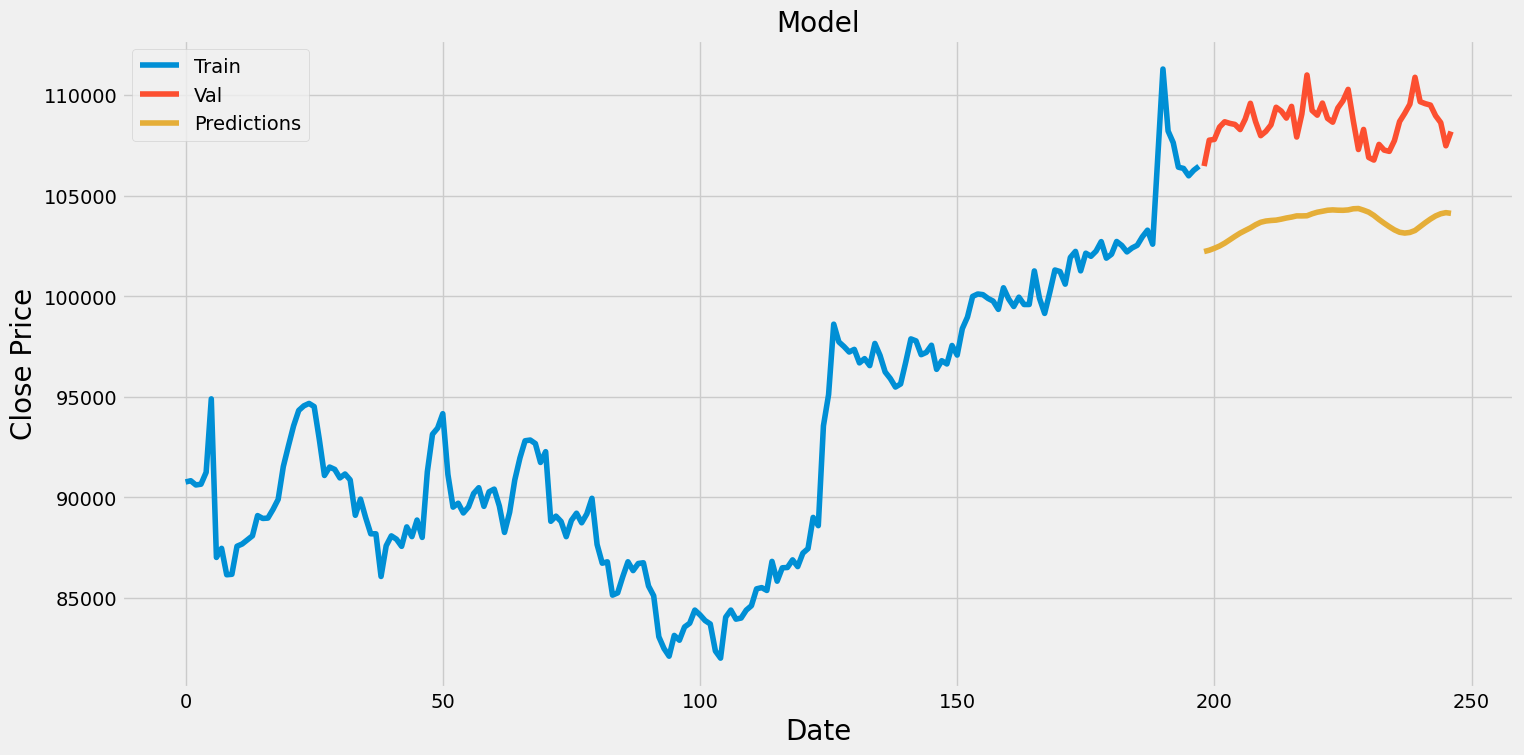

In [ ]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']= predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=20)
plt.ylabel('Close Price', fontsize=20)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'],loc='upper left')
plt.show()

In [ ]:
valid

,Close,Predictions
198,106472.898438,102223.773438
199,107760.351563,102289.976562
200,107798.453125,102385.773438
201,108411.796875,102497.750000
202,108675.546875,102640.992188
203,108595.148438,102808.554688
204,108542.000000,102979.062500
205,108288.000000,103139.210938
206,108812.500000,103271.882812
207,109593.953125,103401.476562


In [ ]:
stock_quote=pd.read_csv("MRF.NS.csv")
new_df=stock_quote.filter(['Close'])
last_60_days=new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
X_list=[]
X_list.append(last_60_days_scaled)
X_list=np.array(X_list)
X_test=np.reshape(X_list,(X_list.shape[0],X_list.shape[1],1))
pred_price=model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print("Predicted price is",pred_price)

1/1 [==============================] - 0s 36ms/step
Predicted price is [[104061.78]]
